In [1]:
import tensorflow as tf
import numpy as np
import os

fixed_size = 224  

def resize_with_aspect_ratio(image, target_size):
    image_shape = tf.shape(image)
    height, width = image_shape[0], image_shape[1]
    aspect_ratio = width / height
    
    if aspect_ratio > 1:  
        new_width = target_size
        new_height = tf.cast(target_size / aspect_ratio, tf.int32)
    else:  
        new_height = target_size
        new_width = tf.cast(target_size * aspect_ratio, tf.int32)
    
    image = tf.image.resize(image, [new_height, new_width])
    image = tf.image.resize_with_crop_or_pad(image, target_size, target_size)
    return image

def preprocess_image(image_path, target_size):
    image = tf.keras.preprocessing.image.load_img(image_path)
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = resize_with_aspect_ratio(image, target_size)
    image = tf.image.convert_image_dtype(image, dtype=tf.float32) 
    return image

def load_images_from_folder(folder_path, target_size):
    image_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith(('.jpg', '.jpeg', '.png'))]
    images = [preprocess_image(img_path, target_size) for img_path in image_paths]
    return np.array(images), image_paths

folder_path = 'photos for AMAN'
target_size = fixed_size 
images, image_paths = load_images_from_folder(folder_path, target_size)


In [2]:
import tensorflow as tf
import os
import numpy as np

image_size = (224, 224)  
batch_size = 32

def load_images_from_folder(folder_path):
    images = []
    filenames = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=image_size)
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            filenames.append(filename)
    images = np.array(images)
    return images, filenames

# Example usage
folder_path = 'photos for AMAN'
images, filenames = load_images_from_folder(folder_path)
images = images / 255.0  

In [3]:
dataset = tf.data.Dataset.from_tensor_slices(images)
dataset = dataset.batch(batch_size)

base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x) 
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [4]:
labels = np.zeros((len(images), 1))  
dataset = tf.data.Dataset.from_tensor_slices((images, labels)).batch(batch_size)

history = model.fit(dataset, epochs=10)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 175s 6s/step - accuracy: 0.9421 - loss: 0.2480
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 1.0000 - loss: 1.6612e-14
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 1.0000 - loss: 2.9121e-19
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 8s/step - accuracy: 1.0000 - loss: 5.8494e-21
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 43s 7s/step - accuracy: 1.0000 - loss: 2.8473e-21
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - accuracy: 1.0000 - loss: 1.7916e-21
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - accuracy: 1.0000 - loss: 1.3944e-21
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 1.0000 - loss: 1.0915e-21
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 1.0000 - loss: 7.7055e-22
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 1.0000 - loss: 5.3972e-22


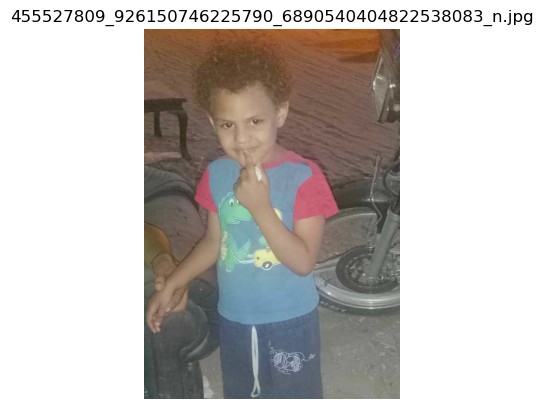

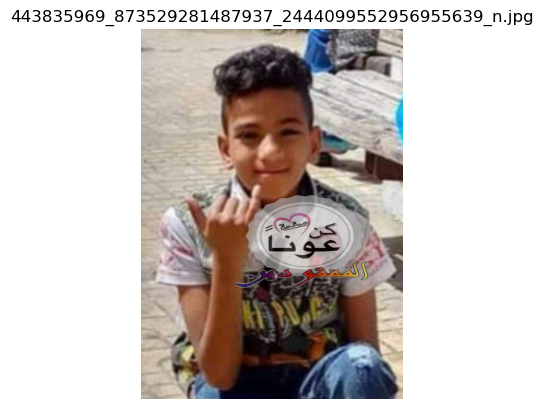

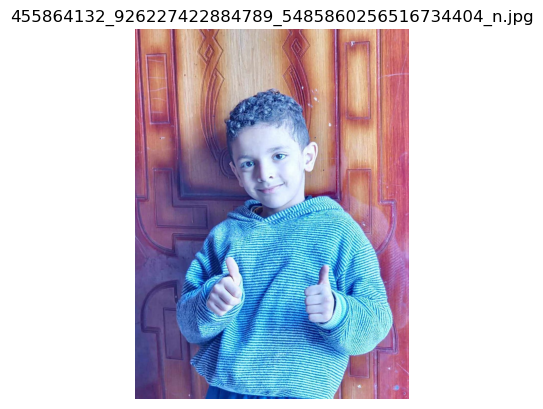

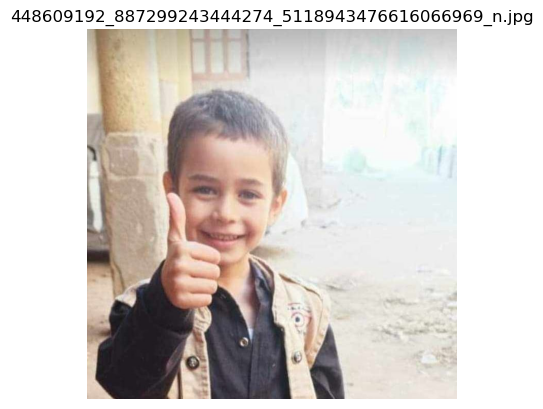

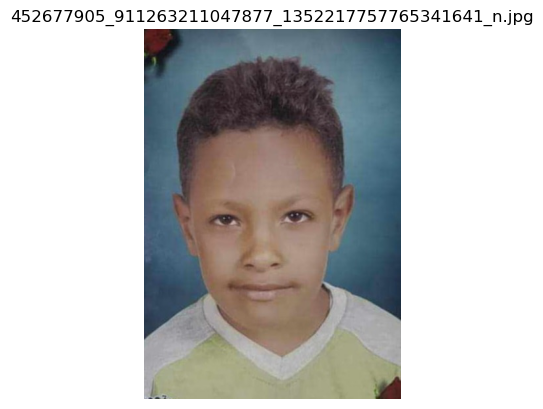

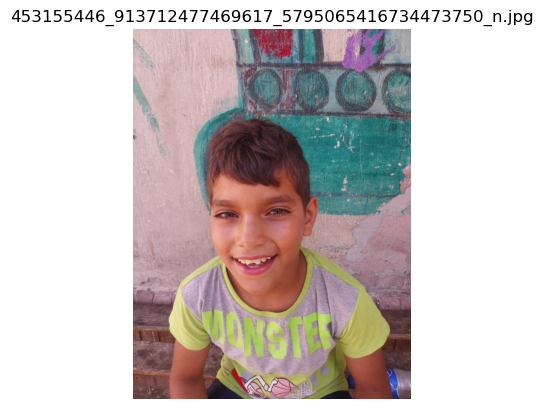

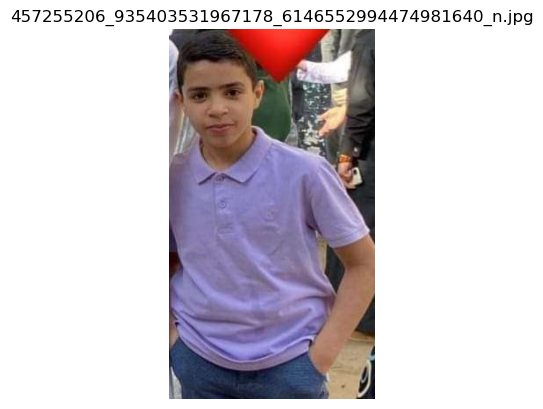

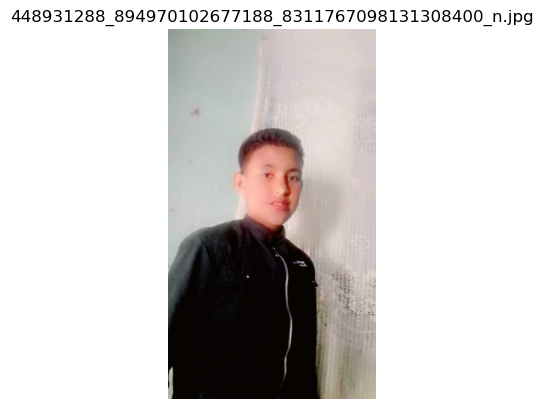

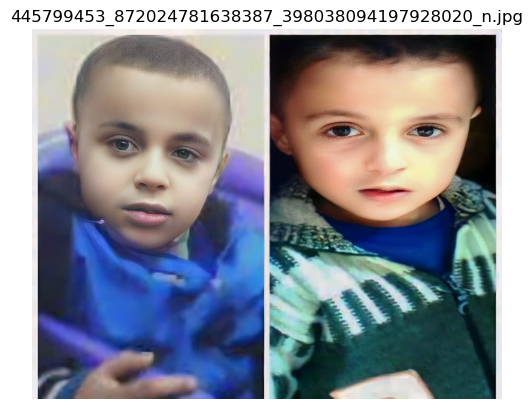

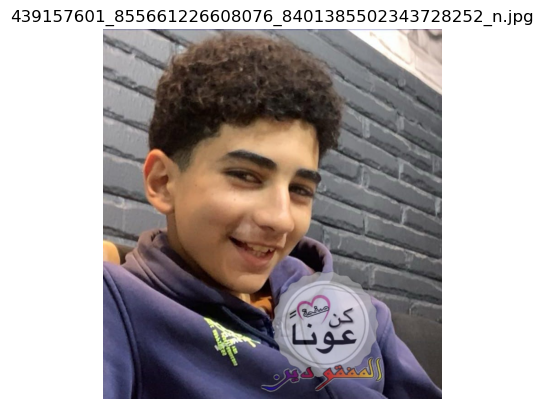

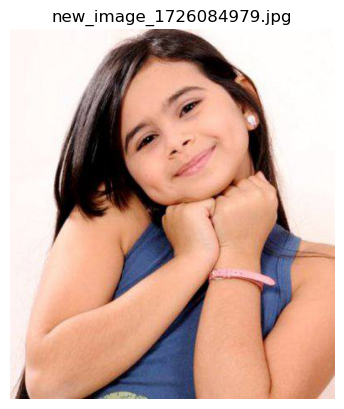

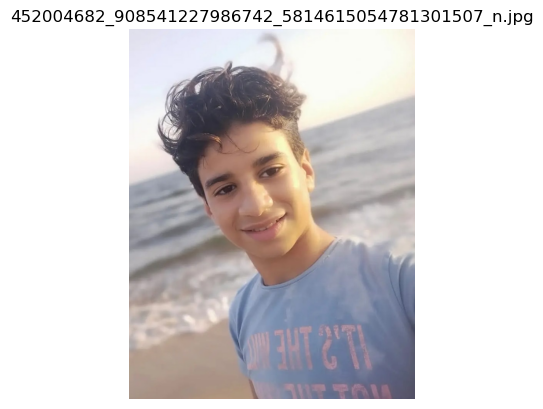

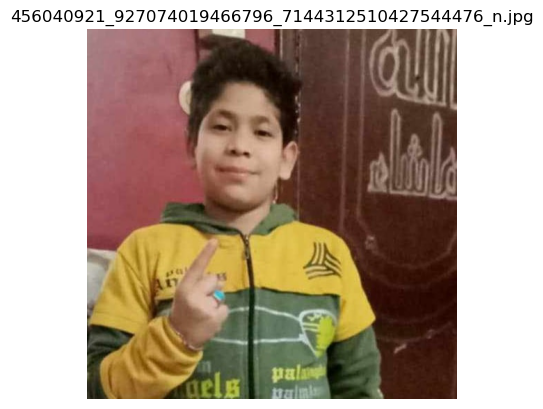

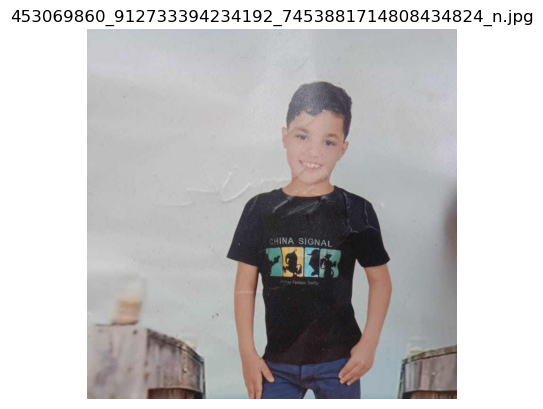

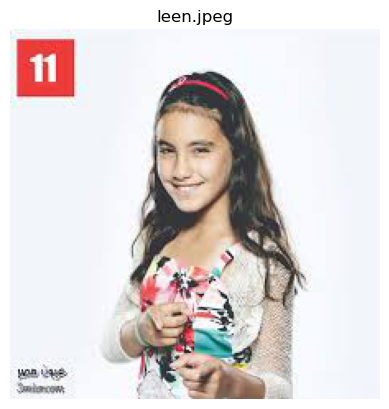

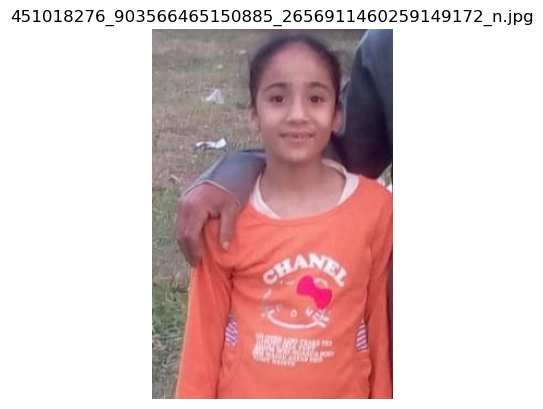

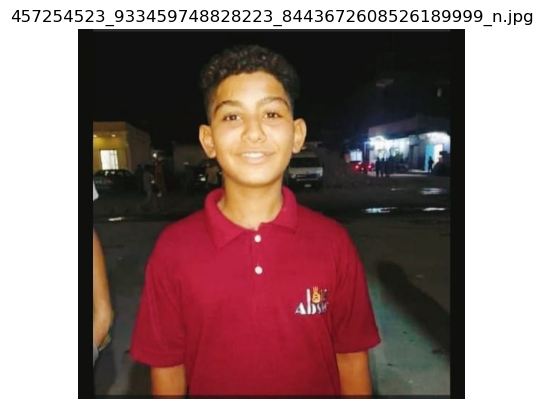

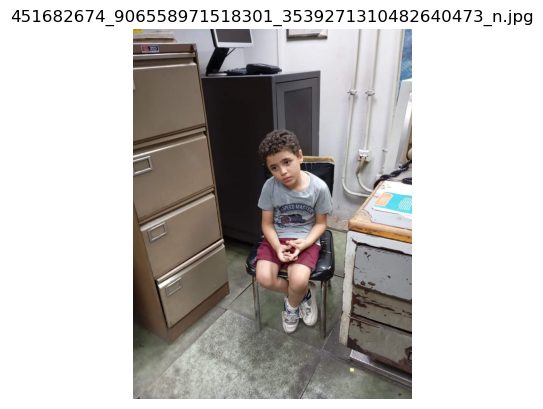

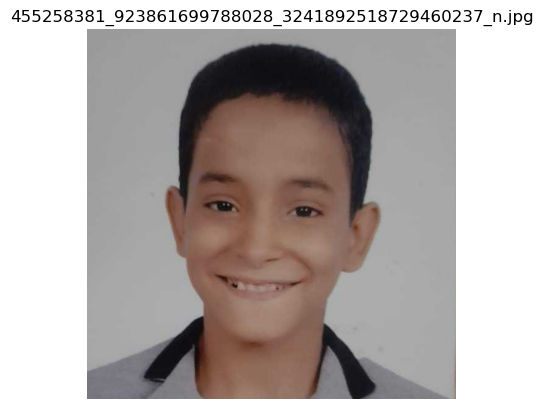

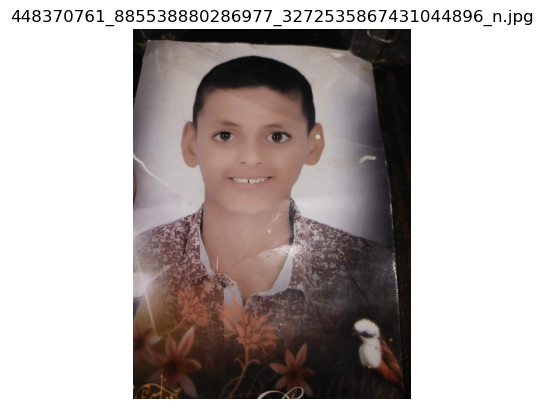

In [5]:
import matplotlib.pyplot as plt
import PIL.Image as Image
import os
import numpy as np

def display_sample_images(folder_path, num_samples=5):
    image_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith(('.jpg', '.jpeg', '.png'))]
    
    sample_paths = np.random.choice(image_paths, num_samples, replace=False)
    
    for img_path in sample_paths:
        img = Image.open(img_path)
        plt.figure()
        plt.imshow(img)
        plt.axis('off')
        plt.title(os.path.basename(img_path))
        plt.show()

display_sample_images(folder_path, num_samples=20)


In [6]:
import os

def count_images_in_folder(folder_path):
    all_files = os.listdir(folder_path)
    
    image_files = [filename for filename in all_files if filename.endswith(('.jpg', '.jpeg', '.png'))]
    
    num_images = len(image_files)
    
    return num_images
num_images = count_images_in_folder(folder_path)
print(f'Number of images in the folder: {num_images}')


Number of images in the folder: 66


In [7]:

# Save the model
model.save('model.h5')

def get_embedding(image_path):
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=image_size)
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = np.expand_dims(image, axis=0) / 255.0
    embedding = model.predict(image)
    return embedding


In [8]:
model.save('my_model.keras')

In [9]:
#pip install ipywidgets pillow tensorflow sklearn


In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_similarity
import os
import shutil
from PIL import Image
import ipywidgets as widgets
from IPython.display import display


In [11]:
model = tf.keras.models.load_model('model.h5')

def preprocess_image(img):
    """Preprocess an image."""
    img = img.resize((224, 224))  
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  
    return img_array


In [12]:

def compute_embedding(model, img_array):
    """Compute embedding using the trained model."""
    embedding = model.predict(img_array)
    return embedding

def load_existing_embeddings(folder_path, model):
    """Load embeddings for all images in the dataset folder."""
    embeddings = {}
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)
            img_array = preprocess_image(img)
            embedding = compute_embedding(model, img_array)
            embeddings[filename] = embedding
    return embeddings

def find_most_similar(embedding, embeddings):
    """Find the most similar image based on cosine similarity."""
    max_similarity = -1
    most_similar_image = None
    for filename, stored_embedding in embeddings.items():
        similarity = cosine_similarity(embedding, stored_embedding).flatten()[0]
        if similarity > max_similarity:
            max_similarity = similarity
            most_similar_image = filename
    return most_similar_image, max_similarity

def save_new_image(img, dataset_folder):
    """Save a new image to the dataset folder."""
    new_img_name = "new_image.jpg"  # Assign a name or use timestamp
    new_img_path = os.path.join(dataset_folder, new_img_name)
    img.save(new_img_path)
    print(f"New image saved as: {new_img_path}")



In [30]:

def process_image(upload_image_path, dataset_folder):
    """Process an image from a given path and compare it with the dataset."""
    img = Image.open(upload_image_path)
    img_array = preprocess_image(img)
    embedding = compute_embedding(model, img_array)

    embeddings = load_existing_embeddings(dataset_folder, model)
    
    print(f"Uploaded image embedding: {embedding}")

    most_similar_image, similarity = find_most_similar(embedding, embeddings)
    
    print(f"Most similar image: {most_similar_image}, Similarity: {similarity}")
    
    if similarity >= 0.8:  
        print(f"Uploaded image is similar to: {most_similar_image} with similarity: {similarity}")
    else:
        print("No similar images found. Saving new image.")
        save_new_image(img, dataset_folder)


upload_image_path = 'mara.jpg'  
dataset_folder = 'photos for AMAN'  

process_image(upload_image_path, dataset_folder)


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0